## Iris Flower

### Basic Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
dataset=pd.read_csv('C:\\Users\\Admin\\Python\\Statistic Notes\\Dataset\\Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
dataset=dataset.drop(columns=['Id'])

### To find the information about the dataset

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Handling missing value

In [17]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Expolatory Data Analysis

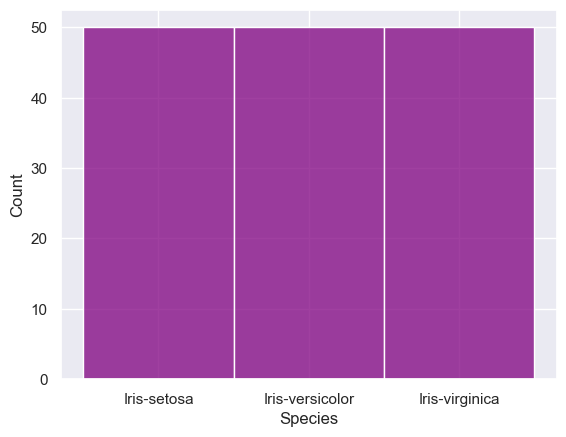

In [18]:
sns.histplot(x='Species',data=dataset,color='Purple')
plt.show()

In [19]:
dataset_setosa = dataset.loc[dataset['Species']=='Iris-setosa']
dataset_virginica = dataset.loc[dataset['Species']=='Iris-virginica']
dataset_versicolor = dataset.loc[dataset['Species']=='Iris-versicolor']

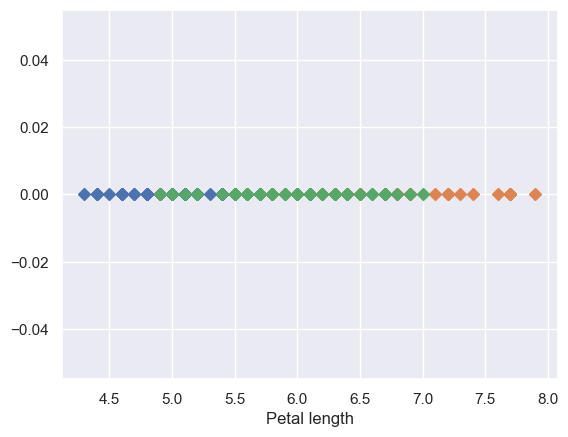

In [29]:
plt.plot(dataset_setosa['SepalLengthCm'], np.zeros_like(dataset_setosa['SepalLengthCm']), 'D')
plt.plot(dataset_virginica['SepalLengthCm'], np.zeros_like(dataset_virginica['SepalLengthCm']), 'D')
plt.plot(dataset_versicolor['SepalLengthCm'], np.zeros_like(dataset_versicolor['SepalLengthCm']), 'D')
plt.xlabel('Petal length')
plt.show()

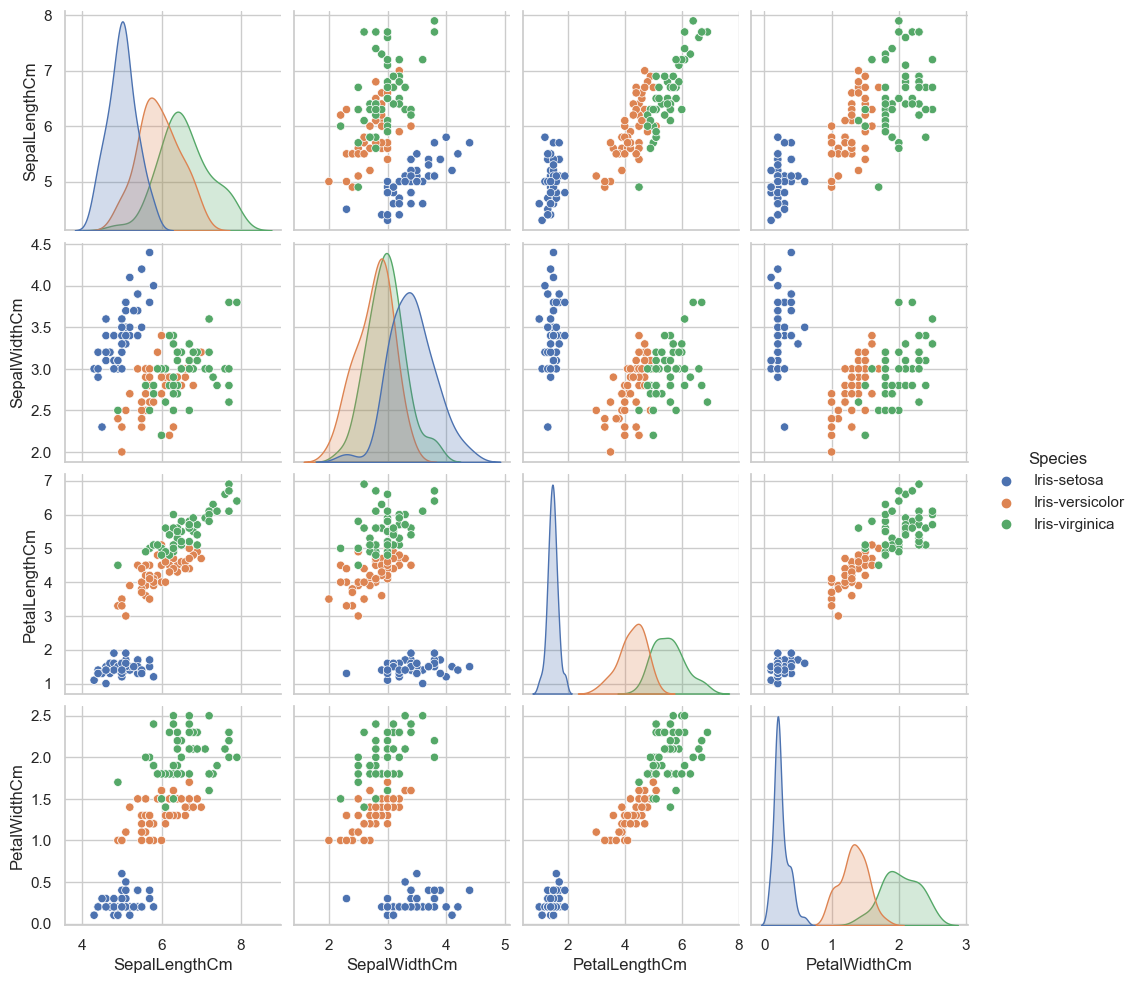

In [31]:
sns.set_style('whitegrid')
sns.pairplot(data=dataset,hue='Species')
plt.show()

In [35]:
dataset['Species']=dataset['Species'].astype('category')
dataset['Species']=dataset['Species'].cat.codes

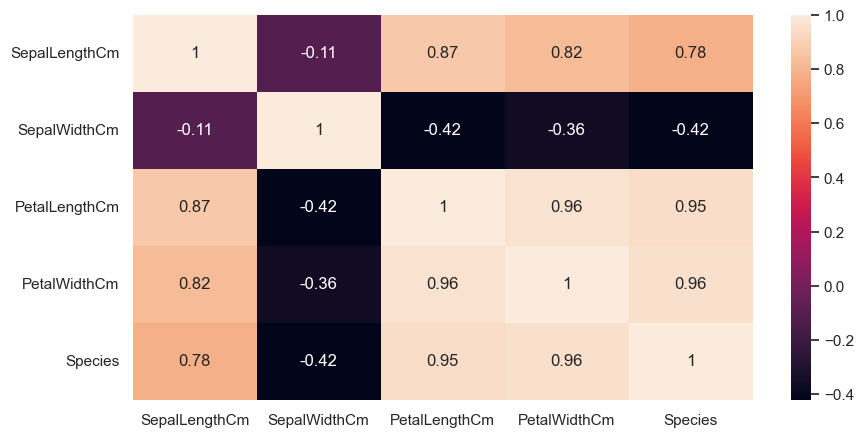

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

#### Feature Scaling

In [39]:
# first we have to split the data into indepedent and dependent variable
x=dataset.iloc[:,:-1]
y=dataset['Species']

In [40]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
pd.DataFrame(x_scaled)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,
                                              random_state=1)

#### Model Building

#### Support Vector Machine

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [46]:
# linear
svc_l=SVC(kernel='linear')
svc_lr=svc_l.fit(x_train,y_train)
y_pred_train_l=svc_lr.predict(x_train)
y_pred_test_l=svc_lr.predict(x_test)
accuracy_score_l_train=accuracy_score(y_train,y_pred_train_l)
accuracy_score_l_test=accuracy_score(y_test,y_pred_test_l)

In [48]:
# sigmoid
svc_s=SVC(kernel='sigmoid')
svc_sg=svc_s.fit(x_train,y_train)
y_pred_train_s=svc_sg.predict(x_train)
y_pred_test_s=svc_sg.predict(x_test)
accuracy_score_s_train=accuracy_score(y_train,y_pred_train_s)
accuracy_score_s_test=accuracy_score(y_test,y_pred_test_s)

In [49]:
# poly
svc_p=SVC(kernel='poly')
svc_pl=svc_p.fit(x_train,y_train)
y_pred_train_p=svc_pl.predict(x_train)
y_pred_test_p=svc_pl.predict(x_test)
accuracy_score_p_train=accuracy_score(y_train,y_pred_train_p)
accuracy_score_p_test=accuracy_score(y_test,y_pred_test_p)

In [50]:
# rbf
svc_r=SVC(kernel='rbf')
svc_rbf=svc_r.fit(x_train,y_train)
y_pred_train_r=svc_rbf.predict(x_train)
y_pred_test_r=svc_rbf.predict(x_test)
accuracy_score_r_train=accuracy_score(y_train,y_pred_train_r)
accuracy_score_r_test=accuracy_score(y_test,y_pred_test_r)

In [51]:
list_1=['SVM_Linear','SVM_Sigmoid','SVM_Poly','SVM_RBF']
list_2=[accuracy_score_l_train,accuracy_score_s_train,accuracy_score_p_train,accuracy_score_r_train]
list_3=[accuracy_score_l_test,accuracy_score_s_test,accuracy_score_p_test,accuracy_score_r_test]

In [52]:
df_test_accuracy=pd.DataFrame({'Method Used':list_1, "Accuracy": list_3})
df_train_accuracy=pd.DataFrame({'Method Used':list_1, "Accuracy": list_2})

Axes(0.125,0.11;0.775x0.77)


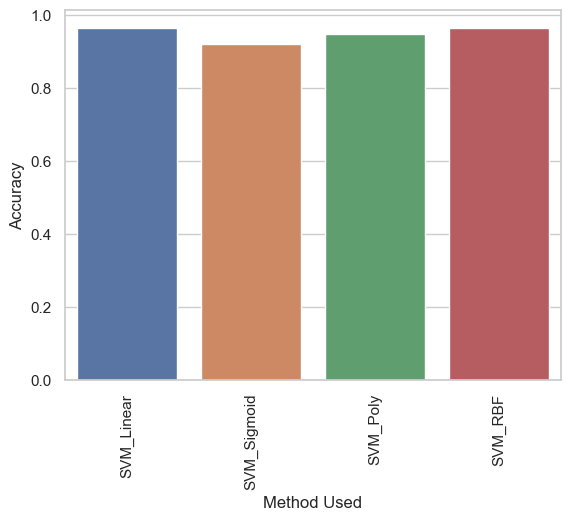

In [53]:
chart=sns.barplot(x='Method Used',y='Accuracy',data=df_train_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

Axes(0.125,0.11;0.775x0.77)


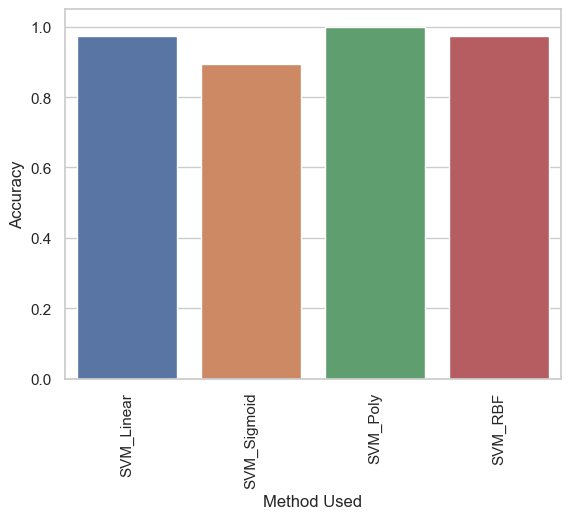

In [54]:
chart=sns.barplot(x='Method Used',y='Accuracy',data=df_test_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)